# Aprendizaje Supervisado - Train and Test

En *Machine Learning* se trata de aprender algunas propiedades de un conjunto de datos y aplicarlos a nuevos datos. Esta es la razón por la cual una práctica común para evaluar un algoritmo es dividir los datos disponibles en dos conjuntos, uno llamado ***training set*** en el que se aprende datos y otro llamado ***testing set*** en el que se prueban estas propiedades aprendidas.

![title](Images/Train_test_set.png)

Para comprender mejor los conceptos se utilizará el *dataset* **IRIS** tratado en el *Notebook 2 -Visualización de Datos*.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

Los datos de ***testing set*** simularán los "datos futuros" que se cargarán al sistema en etapa de producción.

En el *dataset* IRIS se cuenta con 150 muestras ordenadas, lo que quiere decir que si se divide de forma directa y proporcional, la distribución de las clases en los conjuntos de *train* y *test* se alterará. Por ejemplo, si se divide el en 2/3 para *train* y 1/3 para *test*, el primero quedará unicamente con muestras 0 y 1 (Setosa y Versicolor) y el segundo con muestras 2 (Virginica). Al entrenar el modelo bajo estas circunstancias, solo se aprenderá a reconocer las dos primeras dos clases y al presentar el *dataset* de *testing* no podrá identificar a que clase pertenecen estos datos. Lo correcto sería distribuir cada una de las clases de forma aleatoria y equilibrada en ambos conjuntos.

La tarea de dividir el *dataset* en los conjuntos de *train* y *test* es bastante común en *Machine Learning* y *Scikit-learn* cuenta una función para realizarla. Ahora, existen varias porcentajes en los que suelen dividirse los *datasets* pero dependen generalmente del problema tratado, pero lo que siempre debe tenerse en cuenta es que la evaluación se haga con datos no presentados al modelo en la fase de *train*.

En *Scikit-learn* esta tarea se realiza de la siguiente forma:

In [65]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=123)
print("Etiquetas train")
print(train_y)
print("Etiquetas test")
print(test_y)

Etiquetas train
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
Etiquetas test
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


## Partición Estratificada

Es recomendable mantener la proporción de las clases que había en el *dataset* original en los conjuntos *train* y *test* en especial si se trabajan con pocos datos.

In [66]:
import numpy as np
print("Proporción del dataset original: ", np.bincount(y)/float(len(y))*100.0)
print("Proporción del conjunto train: ", np.bincount(train_y)/float(len(train_y))*100)
print("Proporción del conjunto test: ", np.bincount(test_y)/float(len(test_y))*100)

Proporción del dataset original:  [33.33333333 33.33333333 33.33333333]
Proporción del conjunto train:  [30.66666667 40.         29.33333333]
Proporción del conjunto test:  [36.         26.66666667 37.33333333]


Analizando el *split* anterior se puede observar que no se han mantenido las proporciones entre las clases en los conjuntos *train* y *test*. Para realizar la partición estratificada se debe incluir el array de etiquetas al momento de realizar el *split*, esto se hace incluyendo el parámetro *stratify=y*.

In [68]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5,
                                                    random_state=123, stratify=y)

In [62]:
print("Proporción del dataset original: ", np.bincount(y)/float(len(y))*100.0)
print("Proporción del conjunto train: ", np.bincount(train_y)/float(len(train_y))*100)
print("Proporción del conjunto test: ", np.bincount(test_y)/float(len(test_y))*100)

Proporción del dataset original:  [33.33333333 33.33333333 33.33333333]
Proporción del conjunto train:  [33.33333333 33.33333333 33.33333333]
Proporción del conjunto test:  [33.33333333 33.33333333 33.33333333]


A continuación se evaluará el rendimiento de un modelo de clasificación utilizando los conjuntos *train* y *test* generados anteriormente.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Casos correctamente clasificados (CCR) [Precisión] :", np.mean(pred_y == test_y))

Casos correctamente clasificados (CCR) [Precisión] : 0.96


In [64]:
classifier.score(test_X, test_y)

0.96

## Análisis y Visualización de Resultados

Para visualizar aciertos y fallos:

In [52]:
correct_idx = np.where(pred_y == test_y)[0]
incorrect_idx = np.where(pred_y != test_y)[0]

print("Índice de los datos clasificados de forma correcta: \n", correct_idx, "\n")
print("Índice de los datos clasificados de forma incorrecta: \n", incorrect_idx)

Índice de los datos clasificados de forma correcta: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74] 

Índice de los datos clasificados de forma incorrecta: 
 [44 49 60]


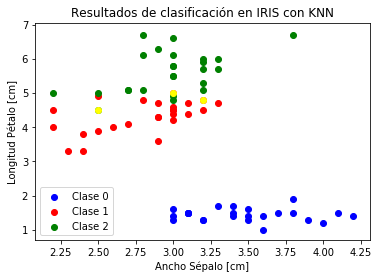

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

correct_idx = np.where(pred_y == test_y)[0]
incorrect_idx = np.where(pred_y != test_y)[0]

colors = ["blue", "red", "green"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Clase %s" % str(n))
    
plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="yellow")

plt.xlabel('Ancho Sépalo [cm]')
plt.ylabel('Longitud Pétalo [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en IRIS con KNN")
plt.show()

Los errores de clasificación se presentan en donde las clases 1 y 2 se superponen. Para tratar de mejorar el rendimiento se deben buscar o añadir características que ayuden a separar las clases.

In [50]:
print("Datos clasificados de forma incorrecta")
print("Etiquetas reales: ", test_y[[incorrect_idx]])
print("Etiquetas del clasificador: ", pred_y[[incorrect_idx]])

Datos clasificados de forma incorrecta
Etiquetas reales:  [1 1 2]
Etiquetas del clasificador:  [2 2 1]
